Dice game
---

Peter has nine four-sided (pyramidal) dice, each with faces numbered $1, 2, 3, 4$.
Colin has six six-sided (cubic) dice, each with faces numbered $1,2,3,4,5,6$.

Peter and Colin roll their dice and compare totals: the highest total wins. The result is a draw if the totals are equal.

What is the probability that Pyramidal Peter beats Cubic Colin? Give your answer rounded to seven decimal places in the form 0.abcdefg.



In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

from IPython.display import clear_output

n4 = 4
dice_4 = list(range(1,5))
n6 = 6
dice_6 = list(range(1,7))

seed = 2023
rng = np.random.default_rng(seed)

In [2]:
rng.choice(dice_4,n4).sum(), rng.choice(dice_6, n6).sum()

(5, 17)

This could be done with brute force. Would need.... at least 10 million trials to settle?
But these sums follow a classic distribution. The central limit theorem will give probabilities of the sums.

The central limit theorem says the average of the values in the list will tend to a gaussian centered at the mean of the list with std of the list.

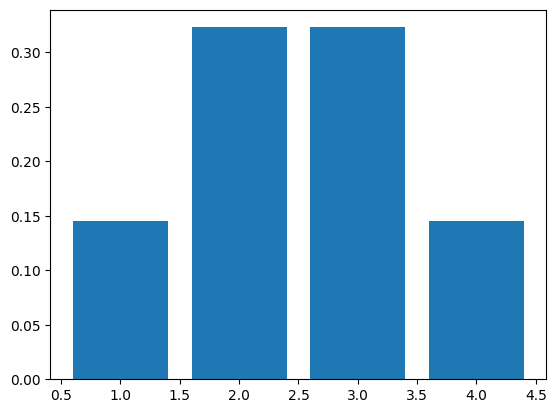

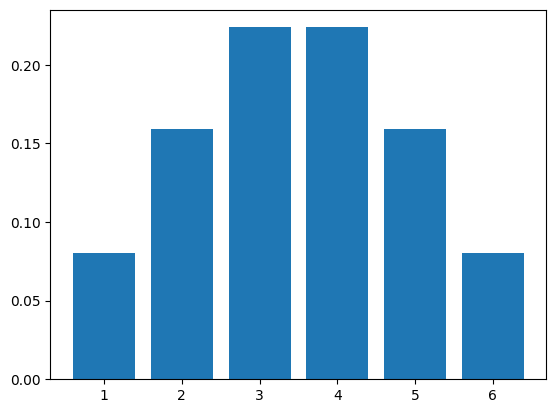

In [3]:
std_6 = np.std(dice_6)
std_4 = np.std(dice_4)
mu_6 = np.mean(dice_6)
mu_4 = np.mean(dice_4)

dist_4 = [
    sp.stats.norm(mu_4, std_4).pdf(roll)
    for roll in dice_4
]
dist_6 = [
    sp.stats.norm(mu_6, std_6).pdf(roll)
    for roll in dice_6
]

plt.bar(dice_4, dist_4)
plt.show()
plt.bar(dice_6, dist_6)
plt.show()

In [4]:
sum(dist_6)

0.9252913416308601

In [5]:
sum(dist_4)

0.9358851974218365

I assume these odds will be in the same proportion without probability leakage outside. Normalizing:

In [6]:
dist_6 = np.array(dist_6)/sum(dist_6)
dist_4 = np.array(dist_4)/sum(dist_4)

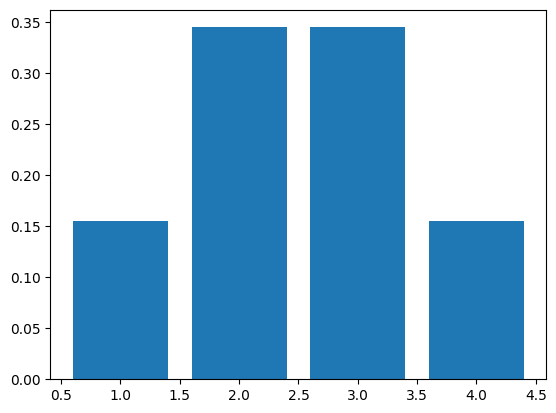

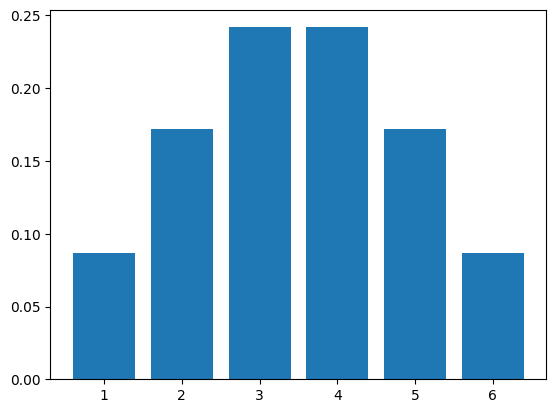

In [7]:

plt.bar(dice_4, dist_4)
plt.show()
plt.bar(dice_6, dist_6)
plt.show()

In [8]:

sum(dist_4)

1.0

In [9]:
sum(dist_6)

1.0

In [10]:
tri = [
    sum(np.random.normal(mu_4, std_4, 9)) 
    for trial in range(100000)
]

(array([1.5000e+01, 2.1000e+02, 2.2730e+03, 1.0988e+04, 2.7134e+04,
        3.2992e+04, 1.9657e+04, 5.8550e+03, 8.1900e+02, 5.7000e+01]),
 array([ 7.19646273, 10.09898245, 13.00150217, 15.90402189, 18.80654161,
        21.70906133, 24.61158105, 27.51410077, 30.4166205 , 33.31914022,
        36.22165994]),
 <BarContainer object of 10 artists>)

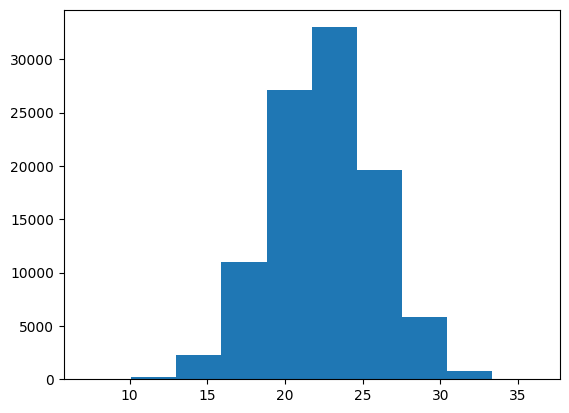

In [11]:
plt.hist(tri)

In [204]:
dist_66 = [
    sp.stats.norm(6*mu_6,np.sqrt(6*std_6)).pdf(the_sum)
    for the_sum in range(6,37)
]

In [205]:
dist_66 = np.array(dist_66)/sum(dist_66)

<BarContainer object of 31 artists>

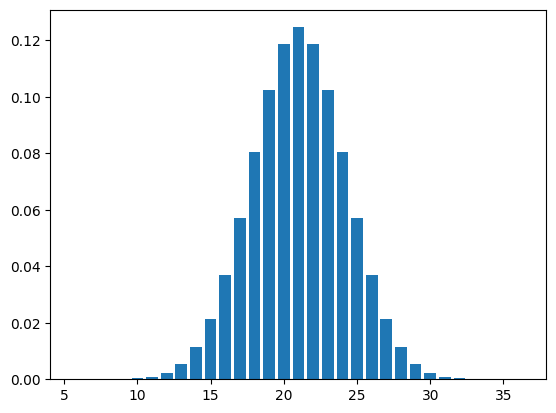

In [206]:
plt.bar(range(6,37),dist_66)

<BarContainer object of 28 artists>

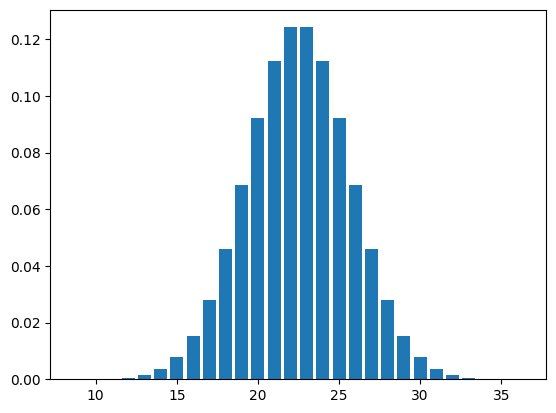

In [208]:
dist_94 = [
    sp.stats.norm(9*mu_4,np.sqrt(9*std_4)).pdf(the_sum)
    for the_sum in range(9,37)
]
dist_94 = np.array(dist_94)/sum(dist_94)
plt.bar(range(9,37),dist_94)

In [51]:
sum(dist_94)

1.0

In [53]:
dist_66 = np.array(list(zip(range(6,37), dist_66)))
dist_66

array([[6.00000000e+00, 1.53316574e-02],
       [7.00000000e+00, 1.76020442e-02],
       [8.00000000e+00, 2.00170912e-02],
       [9.00000000e+00, 2.25477231e-02],
       [1.00000000e+01, 2.51575462e-02],
       [1.10000000e+01, 2.78033884e-02],
       [1.20000000e+01, 3.04362426e-02],
       [1.30000000e+01, 3.30026041e-02],
       [1.40000000e+01, 3.54461641e-02],
       [1.50000000e+01, 3.77097923e-02],
       [1.60000000e+01, 3.97377158e-02],
       [1.70000000e+01, 4.14777815e-02],
       [1.80000000e+01, 4.28836757e-02],
       [1.90000000e+01, 4.39169678e-02],
       [2.00000000e+01, 4.45488558e-02],
       [2.10000000e+01, 4.47614991e-02],
       [2.20000000e+01, 4.45488558e-02],
       [2.30000000e+01, 4.39169678e-02],
       [2.40000000e+01, 4.28836757e-02],
       [2.50000000e+01, 4.14777815e-02],
       [2.60000000e+01, 3.97377158e-02],
       [2.70000000e+01, 3.77097923e-02],
       [2.80000000e+01, 3.54461641e-02],
       [2.90000000e+01, 3.30026041e-02],
       [3.000000

In [54]:
dist_94 = np.array(list(zip(range(9,37), dist_94)))
dist_94

array([[9.00000000e+00, 1.92803984e-02],
       [1.00000000e+01, 2.19218535e-02],
       [1.10000000e+01, 2.46802304e-02],
       [1.20000000e+01, 2.75126118e-02],
       [1.30000000e+01, 3.03686232e-02],
       [1.40000000e+01, 3.31916664e-02],
       [1.50000000e+01, 3.59206083e-02],
       [1.60000000e+01, 3.84918673e-02],
       [1.70000000e+01, 4.08418070e-02],
       [1.80000000e+01, 4.29093158e-02],
       [1.90000000e+01, 4.46384291e-02],
       [2.00000000e+01, 4.59808386e-02],
       [2.10000000e+01, 4.68981319e-02],
       [2.20000000e+01, 4.73636183e-02],
       [2.30000000e+01, 4.73636183e-02],
       [2.40000000e+01, 4.68981319e-02],
       [2.50000000e+01, 4.59808386e-02],
       [2.60000000e+01, 4.46384291e-02],
       [2.70000000e+01, 4.29093158e-02],
       [2.80000000e+01, 4.08418070e-02],
       [2.90000000e+01, 3.84918673e-02],
       [3.00000000e+01, 3.59206083e-02],
       [3.10000000e+01, 3.31916664e-02],
       [3.20000000e+01, 3.03686232e-02],
       [3.300000

In [55]:
dist_94 = np.concatenate(
    [
        [[6,0],
        [7,0],
        [8,0]],
        dist_94
    ]
)

add up
dist_66i . (1-cdf(dist_94(i+1))

In [59]:
[
    [dist_66[dist_66[:, 0] == roll][:,1].sum(),dist_94[dist_94[:, 0] > roll][:,1].sum()]
    for roll in range(6,37)
]

[[0.015331657434321837, 1.0],
 [0.017602044185115965, 1.0],
 [0.020017091242578663, 1.0],
 [0.022547723102810058, 0.980719601562712],
 [0.025157546201757818, 0.9587977480507667],
 [0.027803388432327214, 0.9341175176368897],
 [0.030436242621113087, 0.9066049058394461],
 [0.033002604109184694, 0.8762362826807785],
 [0.035446164134792235, 0.8430446163145988],
 [0.03770979232465056, 0.8071240080548414],
 [0.03973771578434897, 0.7686321407750092],
 [0.041477781541459334, 0.7277903337505509],
 [0.04288367565509833, 0.6848810179107244],
 [0.04391696783561811, 0.6402425887838907],
 [0.04454885582972696, 0.5942617501958821],
 [0.044761499130192325, 0.5473636182682238],
 [0.04454885582972696, 0.49999999999999994],
 [0.04391696783561811, 0.4526363817317763],
 [0.04288367565509833, 0.40573824980411793],
 [0.041477781541459334, 0.35975741121610927],
 [0.03973771578434897, 0.31511898208927563],
 [0.03770979232465056, 0.2722096662494492],
 [0.035446164134792235, 0.23136785922499087],
 [0.033002604109

In [64]:
sum([
    dist_66[dist_66[:, 0] == roll][:,1].sum()*(dist_94[dist_94[:, 0] > roll][:,1]).sum()
    for roll in range(6,37)
])

0.5362256817599842

# Brute Force

In [40]:
num_trials = 100_000_000

dice_6 = [1, 2, 3, 4, 5, 6]
dice_4 = [1, 2, 3, 4]

games = [
    sum(np.random.choice(dice_4, 9)) > sum(np.random.choice(dice_6, 6))
    for trial in range(num_trials)
]
sum(games)

KeyboardInterrupt: 

In [120]:
seed  = 2023
rng = np.random.default_rng(seed)

def roll_cubic(return_sum = True, rng = rng):
    """
    roll Colin's six 6-sided dice.
    """
    rolls = rng.choice([1,2,3,4,5,6],6)
    if return_sum:
        return rolls.sum()
    else:
        return rolls
    
def roll_pyram(return_sum = True,   rng = rng):
    """
    roll Peter's nine 4-sided dice.
    """
    rolls = rng.choice([1,2,3,4], 9)
    if return_sum:
        return rolls.sum()
    else:
        return rolls

In [146]:
num_trials = 100000

cube_results = [
 roll_cubic()
    for trial in range(num_trials)
]

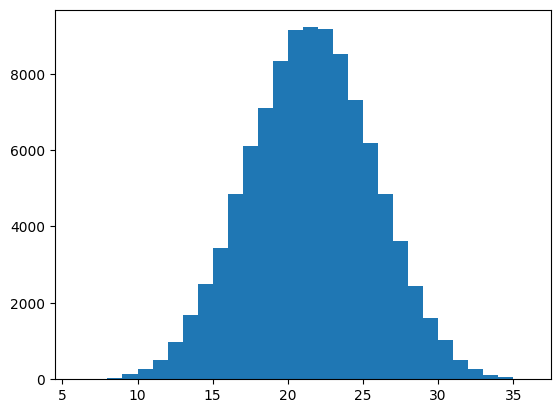

In [149]:
hist_vals, bins, _ = plt.hist(cube_results, bins = range(6,37))

In [151]:
hist_vals / num_trials

array([1.000e-05, 1.500e-04, 4.300e-04, 1.300e-03, 2.730e-03, 4.980e-03,
       9.880e-03, 1.692e-02, 2.506e-02, 3.429e-02, 4.861e-02, 6.118e-02,
       7.101e-02, 8.334e-02, 9.142e-02, 9.215e-02, 9.171e-02, 8.507e-02,
       7.305e-02, 6.177e-02, 4.846e-02, 3.624e-02, 2.445e-02, 1.614e-02,
       1.019e-02, 5.040e-03, 2.760e-03, 1.090e-03, 4.700e-04, 1.000e-04])

<BarContainer object of 30 artists>

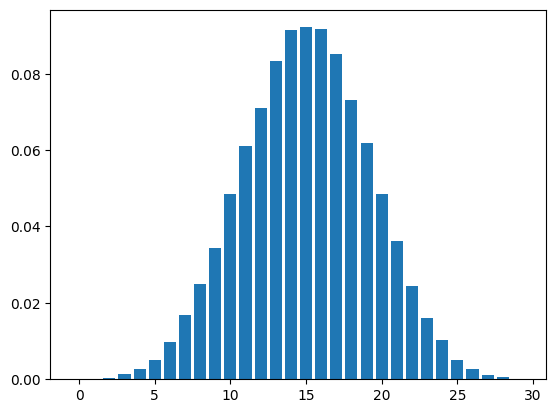

In [154]:
plt.bar(range(len(hist_vals)),hist_vals/ num_trials)

In [160]:
np.std(hist_vals), np.std(hist_vals)/num_trials, np.std(hist_vals/num_trials)

(3331.136696217807, 0.033311366962178075, 0.033311366962178075)

In [161]:
np.std(cube_results)

4.179477972953081

In [164]:
np.std(np.array(cube_results)*num_trials)

417947.79729530815

In [173]:
(hist_vals/num_trials)[:14].sum()

0.35989000000000004

In [174]:
np.std(range(1,4))

0.816496580927726

In [180]:
num_games = 1_000_000
c_wins = 0
for game in range(num_games):
    c_wins += int(roll_cubic() > roll_pyram())

In [181]:
c_wins/num_games

0.355838

In [193]:
chunk_size = 100_000
num_games = 1_000_000
c_wins = 0
progress = 0
print(f'[{"*"*int(progress*100)}{"-"*int((1-progress)*100)}]')
for chunk_no in range(num_games // chunk_size):
    this_chunk = [
        roll_cubic() > roll_pyram()
        for game in range(chunk_size)
    ]
    c_wins += sum(this_chunk)
    progress = (chunk_no+1)*chunk_size / num_games
    clear_output(wait = True)
    print(f'[{"*"*int(progress*100)}{"-"*int((1-progress)*100)}]')
c_wins

[****************************************************************************************************]


356154

In [203]:
sp.stats.norm(9*mu_4, 9*std_4).pdf(25)

0.03844221463644478